
... ***CURRENTLY UNDER DEVELOPMENT*** ...


### TODO


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import pandas as pd
import xarray as xr
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from datetime import datetime


# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.rbf import RBF_Interpolation
from teslakit.mda import Normalize

from teslakit.plotting.extremes import Plot_ReturnPeriodValidation
from teslakit.plotting.estela import Plot_DWTs_Probs
from teslakit.plotting.wts import Plot_Probs_WT_WT



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/albacid/Projects/TeslaKit_projects'
db = Database(p_data)

# set site
db.SetSite('KWAJALEIN_emulator')


# Simulation to plot DWTs and AT
nsim=1


## Load Hyswash simulations

In [34]:
#-------------------------------
# Load historical data

hist_swells = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Historical_swells_tcs/swells_HySwash.nc')
hist_TCs = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Historical_swells_tcs/tcs_HySwash.nc')


# TODO: incluir TCs (las olas de TCs son casi siempre menores...así que creo que no va cambiar gran cosa)
qru_hist = hist_swells.copy(deep=True)


# Compara olas de clima regular y TCs en cada perfil
#for p in hist_swells.profile:
#    plt.figure(figsize=(20,5))
#    plt.plot(hist_swells.time, hist_swells.Qinv.sel(profile=p), '.' ,label='swell')
#    plt.plot(hist_TCs.time, hist_TCs.Qinv.sel(profile=p), '.', label='TCs')
#    plt.legend()
#    plt.title('profile ' + str(p))


In [4]:
#-------------------------------
# Load simulation data

# Load overtopping & runup q(l/s/m). ru2(m)

qru_0 = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_0.nc') 
qru_0 = qru_0.drop({'ru2'})

qru_1 = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_1.nc') 
qru_1 = qru_1.drop({'ru2'})

qru_2 = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_2.nc') 
qru_2 = qru_2.drop({'ru2'})

qru_3 = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_3.nc') 
qru_3 = qru_3.drop({'ru2'})

qru_4 = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_4.nc') 
qru_4 = qru_4.drop({'ru2'})

qru_5 = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_5.nc') 
qru_5 = qru_5.drop({'ru2'})

qru_6 = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_6.nc') 
qru_6 = qru_6.drop({'ru2'})

qru_7 = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_7.nc')
qru_7 = qru_7.drop({'ru2'})

qru_8 = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_8.nc')
qru_8 = qru_8.drop({'ru2'})

qru_9 = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_9.nc')
qru_9 = qru_9.drop({'ru2'})

print(qru_0)
print()
print(qru_1)


OSError: [Errno -101] NetCDF: HDF error: b'/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_9.nc'

In [5]:

qru_9 = xr.open_dataset('/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_9.nc')
qru_9 = qru_9.drop({'ru2'})

OSError: [Errno -101] NetCDF: HDF error: b'/Users/albacid/Projects/SERDP/inputs_Kwajalein/HySwash_outputs/Sims/Sim_9.nc'

In [6]:
# Join simulations

qru_0 = qru_0.assign_coords(n_sim=0).expand_dims('n_sim')
qru_1 = qru_1.assign_coords(n_sim=1).expand_dims('n_sim')
qru_2 = qru_2.assign_coords(n_sim=2).expand_dims('n_sim')
qru_3 = qru_3.assign_coords(n_sim=3).expand_dims('n_sim')
qru_4 = qru_4.assign_coords(n_sim=4).expand_dims('n_sim')
qru_5 = qru_5.assign_coords(n_sim=5).expand_dims('n_sim')
qru_6 = qru_6.assign_coords(n_sim=6).expand_dims('n_sim')
qru_7 = qru_7.assign_coords(n_sim=7).expand_dims('n_sim')
qru_8 = qru_8.assign_coords(n_sim=8).expand_dims('n_sim')
#qru_9 = qru_9.assign_coords(n_sim=9).expand_dims('n_sim')


#qru = xr.concat([qru_0, qru_1], dim='n_sim')
#qru = xr.concat([qru_0, qru_1, qru_2, qru_3, qru_4, qru_5, qru_6, qru_7, qru_8, qru_9], dim='n_sim')
qru = xr.concat([qru_0, qru_1, qru_2, qru_3, qru_4, qru_5, qru_6, qru_7, qru_8], dim='n_sim')
print(qru)


<xarray.Dataset>
Dimensions:  (n_sim: 9, profile: 36, time: 8765832)
Coordinates:
  * profile  (profile) float64 1.0 2.0 3.0 4.0 5.0 ... 32.0 33.0 34.0 35.0 36.0
  * time     (time) object 2000-01-01 00:00:00 ... 2999-12-31 23:00:00.13
  * n_sim    (n_sim) int64 0 1 2 3 4 5 6 7 8
Data variables:
    q        (n_sim, profile, time) float64 nan nan nan nan ... nan nan nan nan


In [9]:
# Only for plotting comparison

#--------------
# Historical
HIST_C_h = db.Load_HIST_OFFSHORE(vns=['DWT', 'AWT', 'AT'],decode_times=True)

# remove NaNs
HIST_C_h = HIST_C_h.where(~np.isnan(HIST_C_h.DWT), drop=True)
HIST_C_h = HIST_C_h.where(~np.isnan(HIST_C_h.AWT), drop=True)
HIST_C_h = HIST_C_h.where(~np.isnan(HIST_C_h.AT), drop=True)
print(HIST_C_h)
print()


#--------------
# Simulations. Load one simulation
offshore_vars = db.Load_SIM_OFFSHORE(n_sim=nsim, vns=['DWT', 'AWT', 'AT'], decode_times=True, use_cftime=True)
print(offshore_vars)


<xarray.Dataset>
Dimensions:  (time: 349608)
Coordinates:
  * time     (time) datetime64[ns] 1979-02-13 ... 2018-12-31T23:00:00
Data variables:
    DWT      (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 33.0 33.0 33.0 33.0 33.0
    AWT      (time) float64 4.0 4.0 4.0 4.0 4.0 4.0 ... 2.0 2.0 2.0 2.0 2.0 2.0
    AT       (time) float64 -0.6199 -0.359 0.001621 ... -0.2365 -0.05054 0.143

<xarray.Dataset>
Dimensions:  (time: 8765832)
Coordinates:
  * time     (time) object 2000-01-01 00:00:00 ... 2999-12-31 23:00:00.13
Data variables:
    DWT      (time) float32 ...
    AWT      (time) float32 ...
    AT       (time) float32 ...


In [10]:
# para quitar
qru = qru.isel(time=slice(0, 876583))
offshore_vars = offshore_vars.isel(time=slice(0, 876583))

print(qru)
print()
print(offshore_vars)

<xarray.Dataset>
Dimensions:  (n_sim: 9, profile: 36, time: 876583)
Coordinates:
  * profile  (profile) float64 1.0 2.0 3.0 4.0 5.0 ... 32.0 33.0 34.0 35.0 36.0
  * time     (time) object 2000-01-01 00:00:00 ... 2099-12-31 06:00:00
  * n_sim    (n_sim) int64 0 1 2 3 4 5 6 7 8
Data variables:
    q        (n_sim, profile, time) float64 nan nan nan nan ... nan nan nan nan

<xarray.Dataset>
Dimensions:  (time: 876583)
Coordinates:
  * time     (time) object 2000-01-01 00:00:00 ... 2099-12-31 06:00:00
Data variables:
    DWT      (time) float32 ...
    AWT      (time) float32 ...
    AT       (time) float32 ...


In [11]:
# Hay nans en los datos:
#for p in qru_2.profile.values:
#    print('profile ' + str(p))
#    
#    kk = qru_2.q.sel(profile=p)
#    print(len(kk.values))
#
#    kk = kk.where(~np.isnan(kk), drop=True)
#    print(len(kk.values))
#    print()
     
    
# sustituir NaNs por 0
qru = qru.where(~np.isnan(qru.q), 0)
print(qru)

qru_hist = qru_hist.where(~np.isnan(qru_hist.Qinv), 0)
print(qru_hist)


<xarray.Dataset>
Dimensions:  (n_sim: 9, profile: 36, time: 876583)
Coordinates:
  * profile  (profile) float64 1.0 2.0 3.0 4.0 5.0 ... 32.0 33.0 34.0 35.0 36.0
  * time     (time) object 2000-01-01 00:00:00 ... 2099-12-31 06:00:00
  * n_sim    (n_sim) int64 0 1 2 3 4 5 6 7 8
Data variables:
    q        (n_sim, profile, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
<xarray.Dataset>
Dimensions:  (profile: 36, time: 340362)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-16T10:00:00
  * profile  (profile) int64 1 2 3 4 5 6 7 8 9 10 ... 28 29 30 31 32 33 34 35 36
Data variables:
    ru2      (profile, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Qinv     (profile, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0


In [12]:
# DatetimeGregorian to datetime
time = [x.timetuple() for x in qru.time.values];
time = [datetime(*x[:6]) for x in time];

qru['time'] = time
offshore_vars['time'] = time


# round times to hour
qru['time'] = qru['time'].dt.round('H')
offshore_vars['time'] = offshore_vars['time'].dt.round('H')


## Extreme events: Annual Maxima inundation volumes

In [13]:
#--------------------------
# Historical data

# Neglect values in each profile where Q<0.001 l/s/m (neglegible)
qru_hist['Qinv'] = qru_hist.Qinv.where(qru_hist.Qinv.values>=0.001, 0)

# Sum all profiles
qru_hist_all = qru_hist.sum(dim='profile')

print(qru_hist)
print()
print(qru_hist_all)
print()
print()


#--------------------------
# Simulations

# Neglect values in each profile where Q<0.001 l/s/m (neglegible)
qru['q'] = qru.q.where(qru.q.values>=0.001, 0)

# Sum all profiles
qru_all = qru.sum(dim='profile')

print(qru)
print()
print(qru_all)



<xarray.Dataset>
Dimensions:  (profile: 36, time: 340362)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-16T10:00:00
  * profile  (profile) int64 1 2 3 4 5 6 7 8 9 10 ... 28 29 30 31 32 33 34 35 36
Data variables:
    ru2      (profile, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Qinv     (profile, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

<xarray.Dataset>
Dimensions:  (time: 340362)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-16T10:00:00
Data variables:
    ru2      (time) float64 -1.296 -0.9848 -0.6548 3.868 ... 0.1186 12.79 0.9057
    Qinv     (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0


<xarray.Dataset>
Dimensions:  (n_sim: 9, profile: 36, time: 876583)
Coordinates:
  * profile  (profile) float64 1.0 2.0 3.0 4.0 5.0 ... 32.0 33.0 34.0 35.0 36.0
  * time     (time) datetime64[ns] 2000-01-01 ... 2099-12-31T06:00:00
  * n_sim    (n_sim) int64 0 1 2 3 4 5 6 7 8
Data variables:


#### Overtopping to inundation volumes: Historical

In [14]:
# Obtain duration of events
qru_hist_all['inundation_vol'] = qru_hist_all.Qinv*np.nan


# identify peaks
ind = np.where(qru_hist_all.Qinv!=0)[0]

ind2 = np.where(np.diff(ind)!=1)[0]
ind2 = np.concatenate(([-1],ind2)) # fix last event?

# new var for qru_hist_all
ed_vol = np.zeros(len(qru_hist_all.time))*np.nan

for ix in range(len(ind2)-1):      
    ix1 = ind2[ix]+1
    ix2 = ind2[ix+1]+1

    ind_t = ind[ix1:ix2]
    q_peak = qru_hist_all.Qinv[ind_t] # l/s/m
    
    # overtopping to inundation volume
    vol = np.sum(q_peak.values)*3600 # l/m. los datos son horarios, cada valor de caudal se multiplica por la duracion.

    ind_max = np.argmax(q_peak.values)
    ind_max = ind_t[ind_max]

    ed_vol[ind_max] = vol

    
qru_hist_all['inundation_vol'] = (('time'), ed_vol) # duration of the overtopping event (hours)
    
qru_hist_all['inundation_vol'] = qru_hist_all['inundation_vol'].where(~np.isnan(qru_hist_all['inundation_vol']), 0)
print(qru_hist_all)


<xarray.Dataset>
Dimensions:         (time: 340362)
Coordinates:
  * time            (time) datetime64[ns] 1979-01-01 ... 2018-12-16T10:00:00
Data variables:
    ru2             (time) float64 -1.296 -0.9848 -0.6548 ... 12.79 0.9057
    Qinv            (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    inundation_vol  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0


#### Overtopping to inundation volumes: Simulations

In [15]:
# Obtain duration of events
qru_all['inundation_vol'] = qru_all.q*np.nan

for n in qru_all.n_sim:
    
    qru_all_nsim = qru_all.q.sel(n_sim=n)
    
    # identify peaks
    ind = np.where(qru_all_nsim!=0)[0]

    ind2 = np.where(np.diff(ind)!=1)[0]
    ind2 = np.concatenate(([-1],ind2)) # fix last event?

    # new var for qru_all
    ed_vol = np.zeros(len(qru_all.time))*np.nan

    for ix in range(len(ind2)-1):      
        ix1 = ind2[ix]+1
        ix2 = ind2[ix+1]+1

        ind_t = ind[ix1:ix2]
        q_peak = qru_all_nsim[ind_t] # l/s/m
        vol = np.sum(q_peak.values)*3600 # l/m. los datos son horarios, cada valor de caudal se multiplica por la duracion.
        
        ind_max = np.argmax(q_peak.values)
        ind_max = ind_t[ind_max]
        
        ed_vol[ind_max] = vol

    qru_all['inundation_vol'][n,:] = ed_vol # duration of the overtopping event (hours)
    
    
qru_all['inundation_vol'] = qru_all['inundation_vol'].where(~np.isnan(qru_all['inundation_vol']), 0)
print(qru_all)


<xarray.Dataset>
Dimensions:         (n_sim: 9, time: 876583)
Coordinates:
  * time            (time) datetime64[ns] 2000-01-01 ... 2099-12-31T06:00:00
  * n_sim           (n_sim) int64 0 1 2 3 4 5 6 7 8
Data variables:
    q               (n_sim, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    inundation_vol  (n_sim, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0


#### Annual maxima of inundation volumes

In [16]:
# def. some auxiliar function to select all dataset variables at vn max by groups

def grouped_max(ds, vn=None, dim=None):
    return ds.isel(**{dim: ds[vn].argmax(dim)})


In [19]:
# -------------------------------------------------------------------------
# Obtain instant of annual maxima overtopping from the sum of all profiles

# Historical
vol_hist_all_AMax = qru_hist_all.groupby('time.year').apply(grouped_max, vn='inundation_vol', dim='time')
print(vol_hist_all_AMax)
print()

# Simulation
vol_all_AMax = qru_all.groupby('time.year').apply(grouped_max, vn='inundation_vol', dim='time')
print(vol_all_AMax)
print()



# Hay años donde el máximo es 0?:
print('----------')
print(len(vol_hist_all_AMax.year.where(vol_hist_all_AMax.inundation_vol!=0,drop=True)))

for n in vol_all_AMax.n_sim.values:
    print(len(vol_all_AMax.year.where(vol_all_AMax.inundation_vol.isel(n_sim=n)!=0,drop=True)))


<xarray.Dataset>
Dimensions:         (year: 40)
Coordinates:
    time            (year) datetime64[ns] 1979-01-03T09:00:00 ... 2018-02-14T03:00:00
  * year            (year) int64 1979 1980 1981 1982 ... 2015 2016 2017 2018
Data variables:
    ru2             (year) float64 22.94 27.47 24.88 15.4 ... 19.92 26.78 20.19
    Qinv            (year) float64 21.71 0.2363 1.885 ... 0.02605 0.01464
    inundation_vol  (year) float64 7.817e+04 850.7 6.787e+03 ... 93.77 52.72

<xarray.Dataset>
Dimensions:         (n_sim: 9, year: 100)
Coordinates:
  * n_sim           (n_sim) int64 0 1 2 3 4 5 6 7 8
    time            (year, n_sim) datetime64[ns] 2000-03-18T04:00:00 ... 2099-12-12T04:00:00
  * year            (year) int64 2000 2001 2002 2003 ... 2096 2097 2098 2099
Data variables:
    q               (year, n_sim) float64 0.04382 0.05169 ... 0.01076 0.05163
    inundation_vol  (year, n_sim) float64 561.1 544.0 308.2 ... 100.4 678.1

----------
40
100
100
100
100
100
100
100
100
100



## Return periods from Annual Maxima inundation volumes

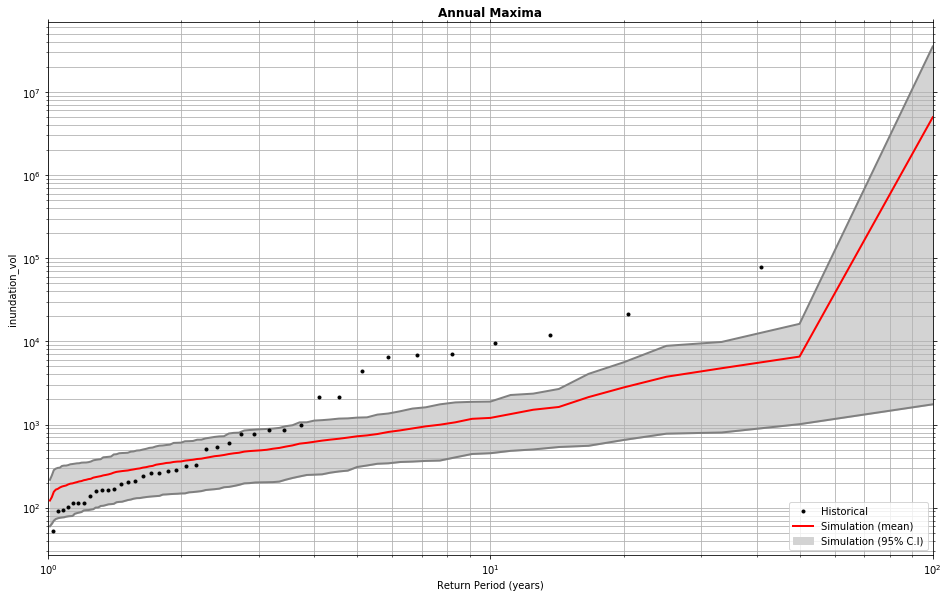

In [62]:
fig = Plot_ReturnPeriodValidation(vol_hist_all_AMax['inundation_vol'], vol_all_AMax['inundation_vol'].transpose(), show=False);
plt.gca().set_yscale('log')


In [120]:
# TODO: revisar esta función

#--------------------------
# Obtain Return periods:

# aux func for calculating rp time
def t_rp(time_y):
    ny = len(time_y)
    return np.array([1/(1-(n/(ny+1))) for n in np.arange(1,ny+1)])
    
    
# RP calculation, var sorting simulation
t_s = t_rp(vol_all_AMax.year.values[:-1])  # remove last year*
t_s = np.concatenate(([1],t_s))


# create dataset with sorted inundation volumes
xds = xr.Dataset({'vol_sorted': (('return_period','n_sim'), np.zeros(np.shape(vol_all_AMax['inundation_vol']))*np.nan)},
    coords = {'return_period': t_s})

for n in vol_all_AMax.n_sim.values:
    xds['vol_sorted'][:,n] = np.sort(vol_all_AMax['inundation_vol'].sel(n_sim=n).values[:])  

    
# Add associated return period to each year    
sims_rp = np.zeros((len(vol_all_AMax.time), len(vol_all_AMax.n_sim))) * np.nan

# solve each simulation
for n in vol_all_AMax.n_sim:
    
    # get annual maxima
    amax = vol_all_AMax.sel(n_sim=n)['inundation_vol']
    
    # solve each year
    for cy, y in enumerate(amax.year):
        
        # get return period for this year
        ay = amax.sel(year=y).values
        ix = np.where(xds['vol_sorted'].sel(n_sim=n).values[:]==ay)[0][0]
        ay_rp = xds['return_period'].values[ix]
        
        # store data
        sims_rp[cy, n] = ay_rp

# add return periods to dataset
vol_all_AMax['return_period'] = (('year','n_sim'), sims_rp)

print(vol_all_AMax)

    
        

<xarray.Dataset>
Dimensions:         (n_sim: 9, year: 100)
Coordinates:
  * n_sim           (n_sim) int64 0 1 2 3 4 5 6 7 8
    time            (year, n_sim) datetime64[ns] 2000-03-18T04:00:00 ... 2099-12-12T04:00:00
  * year            (year) int64 2000 2001 2002 2003 ... 2096 2097 2098 2099
Data variables:
    q               (year, n_sim) float64 0.04382 0.05169 ... 0.01076 0.05163
    inundation_vol  (year, n_sim) float64 561.1 544.0 308.2 ... 100.4 678.1
    return_period   (year, n_sim) float64 1.887 2.703 1.818 ... 1.299 2.222


In [ ]:
# Save annual maxima events for each profile for LisFlood
# Save return periods of annual maxima events for each profile (LisFlood input)


In [48]:
# Obtain annual maxima events

def peaks_cleaner(xda):
    '''
    Locates annual maxima and attached variable peak, cleans everything else
    
    xda - input data array
    '''
    
    # find annual maxima and dates   
    def grouped_max(da, dim=None):
        return da.isel(**{dim: da.argmax(dim)})
    xmax = xda.groupby('time.year').apply(grouped_max, dim='time')
    
    # initialize output (clean data array)
    xda_clean = xda.copy(deep=True)
    xda_clean.values[:] = np.nan
    
    # find all ZERO values (peaks must start and end at val=0)
    ix_zs = np.where(xda.values[:] == 0)[0]

    # clean data year by year
    for t_peak, v_peak in zip(xmax.time.values[:], xmax.values[:]):
        
        # skip years without value
        if v_peak == 0: continue
        
        # find peak max index, locate this index "zero indexes" left and right neighbours
        ix_p = np.where(t_peak == xda.time)[0]
        
        ix_z0 = ix_zs[np.where(ix_zs<ix_p)[0][-1]] +1 # first zero to the left
        ix_z1 = ix_zs[np.where(ix_zs>ix_p)[0][0]]  # first zero to the right
        
        # fill clean output with main peak values
        xda_clean.values[ix_z0:ix_z1] = xda.values[ix_z0:ix_z1]
    
    return xda_clean

<xarray.Dataset>
Dimensions:  (time: 876583)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2099-12-31T06:00:00
    n_sim    int64 0
Data variables:
    ru2      (time) float64 17.3 17.95 17.61 16.38 ... 12.43 16.72 20.64 23.21
    q        (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

<xarray.DataArray 'q' (time: 876583)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2099-12-31T06:00:00
    n_sim    int64 0
<xarray.Dataset>
Dimensions:  (time: 876583)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2099-12-31T06:00:00
    n_sim    int64 1
Data variables:
    ru2      (time) float64 17.3 17.95 17.61 16.38 ... 12.43 16.72 20.64 23.21
    q        (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

<xarray.DataArray 'q' (time: 876583)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2099-12-31T06:00:00
 

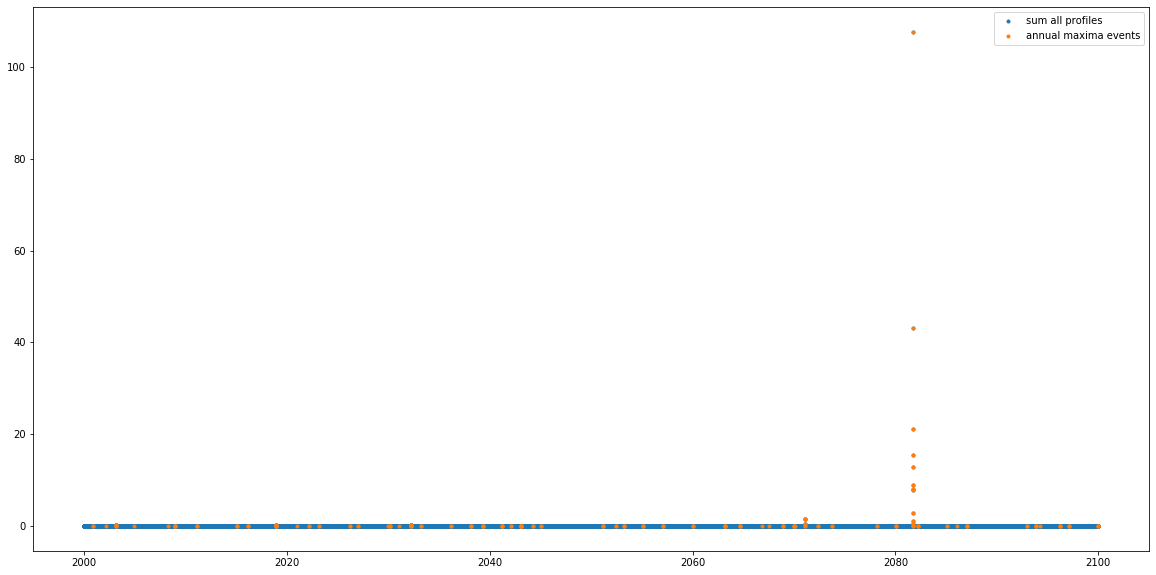

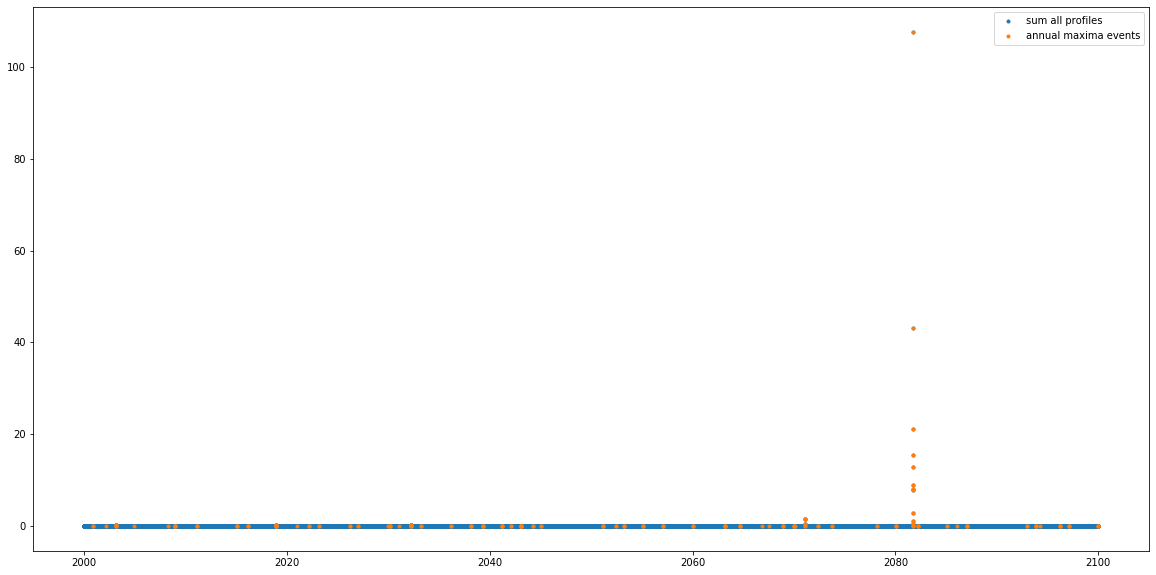

In [62]:
# Obtain Annual maxima events for each n_sim

for n in qru_all.n_sim:
    
    qru_all_nsim = qru_all.sel(n_sim=n)    
    print(qru_all_nsim)
    print()
    
    qru_all_nsim_Amax = peaks_cleaner(qru_all_nsim.q)
    print(qru_all_nsim_Amax)
    
    plt.figure(figsize=(20,10))
    plt.plot(qru_all_nsim.time, qru_all_nsim.q, '.', label='sum all profiles')
    plt.plot(qru_all_nsim_Amax.time, qru_all_nsim_Amax.values, '.', label= 'annual maxima events')
    plt.legend()
    
# TODO: save all sims

## DWT and AT associated to Annual maxima events

In [21]:
# ------------------
# Simulation

offshore_vars['AT_category'] = offshore_vars.AT*np.nan


# Tide values <= 0 assign to cat 1
ind = np.where(offshore_vars.AT <=0)[0]
offshore_vars['AT_category'][ind] = 1


# Tide values >0 assign to cat 2-6
AT_positive = offshore_vars.AT.where(offshore_vars.AT>0, drop=True)
AT_perc = np.percentile(AT_positive.values, [50, 75, 95, 99, 100])

# cat 1
ind = np.where((offshore_vars.AT > 0) & (offshore_vars.AT <= AT_perc[0]))[0]
offshore_vars['AT_category'][ind] = 2

# cat 2
ind = np.where((offshore_vars.AT > AT_perc[0]) & (offshore_vars.AT <= AT_perc[1]))[0]
offshore_vars['AT_category'][ind] = 3

# cat 3
ind = np.where((offshore_vars.AT > AT_perc[1]) & (offshore_vars.AT <= AT_perc[2]))[0]
offshore_vars['AT_category'][ind] = 4

# cat 4
ind = np.where((offshore_vars.AT > AT_perc[2]) & (offshore_vars.AT <= AT_perc[3]))[0]
offshore_vars['AT_category'][ind] = 5

# cat 5
ind = np.where((offshore_vars.AT > AT_perc[3]) & (offshore_vars.AT <= AT_perc[4]))[0]
offshore_vars['AT_category'][ind] = 6


print('AT cat 1:', '<0')
print('AT cat 2:', 0, '-', round(AT_perc[0],4))
print('AT cat 3:', round(AT_perc[0],4), '-',  round(AT_perc[1],4))
print('AT cat 4:', round(AT_perc[1],4), '-',  round(AT_perc[2],4))
print('AT cat 5:', round(AT_perc[2],4), '-',  round(AT_perc[3],4))
print('AT cat 6:', round(AT_perc[3],4), '-',  round(AT_perc[4],4))
print()
print(offshore_vars)


AT cat 1: <0
AT cat 2: 0 - 0.3039
AT cat 3: 0.3039 - 0.4972
AT cat 4: 0.4972 - 0.77
AT cat 5: 0.77 - 0.9031
AT cat 6: 0.9031 - 1.068

<xarray.Dataset>
Dimensions:      (time: 876583)
Coordinates:
  * time         (time) datetime64[ns] 2000-01-01 ... 2099-12-31T06:00:00
Data variables:
    DWT          (time) float32 ...
    AWT          (time) float32 ...
    AT           (time) float32 ...
    AT_category  (time) float32 2.0 2.0 2.0 2.0 2.0 1.0 ... 1.0 1.0 2.0 3.0 4.0


In [22]:
# ------------------
# Historical

HIST_C_h['AT_category'] = HIST_C_h.AT*np.nan


# Tide values <= 0 assign to cat 1
ind = np.where(HIST_C_h.AT <=0)[0]
HIST_C_h['AT_category'][ind] = 1


# Tide values >0 assign to cat 2-6

# cat 1
ind = np.where((HIST_C_h.AT > 0) & (HIST_C_h.AT <= AT_perc[0]))[0]
HIST_C_h['AT_category'][ind] = 2

# cat 2
ind = np.where((HIST_C_h.AT > AT_perc[0]) & (HIST_C_h.AT <= AT_perc[1]))[0]
HIST_C_h['AT_category'][ind] = 3

# cat 3
ind = np.where((HIST_C_h.AT > AT_perc[1]) & (HIST_C_h.AT <= AT_perc[2]))[0]
HIST_C_h['AT_category'][ind] = 4

# cat 4
ind = np.where((HIST_C_h.AT > AT_perc[2]) & (HIST_C_h.AT <= AT_perc[3]))[0]
HIST_C_h['AT_category'][ind] = 5

# cat 5
ind = np.where((HIST_C_h.AT > AT_perc[3]) & (HIST_C_h.AT <= AT_perc[4]))[0]
HIST_C_h['AT_category'][ind] = 6


print(HIST_C_h)


<xarray.Dataset>
Dimensions:      (time: 349608)
Coordinates:
  * time         (time) datetime64[ns] 1979-02-13 ... 2018-12-31T23:00:00
Data variables:
    DWT          (time) float64 1.0 1.0 1.0 1.0 1.0 ... 33.0 33.0 33.0 33.0 33.0
    AWT          (time) float64 4.0 4.0 4.0 4.0 4.0 4.0 ... 2.0 2.0 2.0 2.0 2.0
    AT           (time) float64 -0.6199 -0.359 0.001621 ... -0.05054 0.143
    AT_category  (time) float64 1.0 1.0 2.0 3.0 4.0 5.0 ... 1.0 1.0 1.0 1.0 2.0


In [23]:
# -------------------------------------------------------------------------
# Remove values where annual maxima is 0??? 

# Historical
#vol_hist_all_AMax = vol_hist_all_AMax.where(vol_hist_all_AMax.inundation_vol!=0, drop=True)
print(vol_hist_all_AMax)
print()

# Simulation
#vol_all_AMax = vol_all_AMax.where(vol_all_AMax.inundation_vol!=0, drop=True)
print(vol_all_AMax)
print()


# -------------------------------------------------------------------------
# Select variables at annual maxima. Choose one simulation

HIST_C_h_Amax = HIST_C_h.sel(time=vol_hist_all_AMax.time[1:]) # HIST_C_h empieza en Feb 1979, no hay enero, que es donde sucede el primer máximo

offshore_vars_AMax = offshore_vars.sel(time=vol_all_AMax.time.sel(n_sim=nsim))

print(HIST_C_h_Amax)
print(offshore_vars_AMax)
print()


u, indices = np.unique(HIST_C_h_Amax.AT_category, return_counts=True)

print(u)
print(indices)
print()

u, indices = np.unique(offshore_vars_AMax.AT_category, return_counts=True)
print(u)
print(indices)


<xarray.Dataset>
Dimensions:         (year: 40)
Coordinates:
    time            (year) datetime64[ns] 1979-01-03T09:00:00 ... 2018-02-14T03:00:00
  * year            (year) int64 1979 1980 1981 1982 ... 2015 2016 2017 2018
Data variables:
    ru2             (year) float64 22.94 27.47 24.88 15.4 ... 19.92 26.78 20.19
    Qinv            (year) float64 21.71 0.2363 1.885 ... 0.02605 0.01464
    inundation_vol  (year) float64 7.817e+04 850.7 6.787e+03 ... 93.77 52.72

<xarray.Dataset>
Dimensions:         (n_sim: 9, year: 100)
Coordinates:
  * n_sim           (n_sim) int64 0 1 2 3 4 5 6 7 8
    time            (year, n_sim) datetime64[ns] 2000-03-18T04:00:00 ... 2099-12-12T04:00:00
  * year            (year) int64 2000 2001 2002 2003 ... 2096 2097 2098 2099
Data variables:
    q               (year, n_sim) float64 0.04382 0.05169 ... 0.01076 0.05163
    inundation_vol  (year, n_sim) float64 561.1 544.0 308.2 ... 100.4 678.1

<xarray.Dataset>
Dimensions:      (year: 39)
Coordinates:
    t

In [ ]:

# si quitamos los Q<0.01
[1. 2. 3. 4. 5. 6.]
[ 1  1 10  9  8  6]

[1. 2. 3. 4. 5. 6.]
[19  9  4 14 19 16]


# si quitamos los Q<0.001
[1. 2. 3. 4. 5. 6.]
[ 1  1 10  8 11  8]

[1. 2. 3. 4. 5. 6.]
[ 2  4  7 28 26 33]

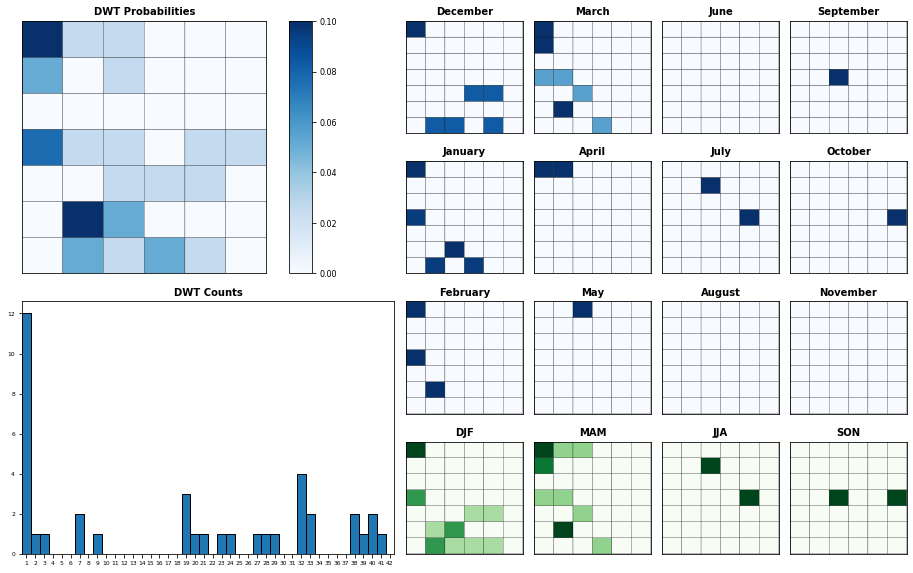

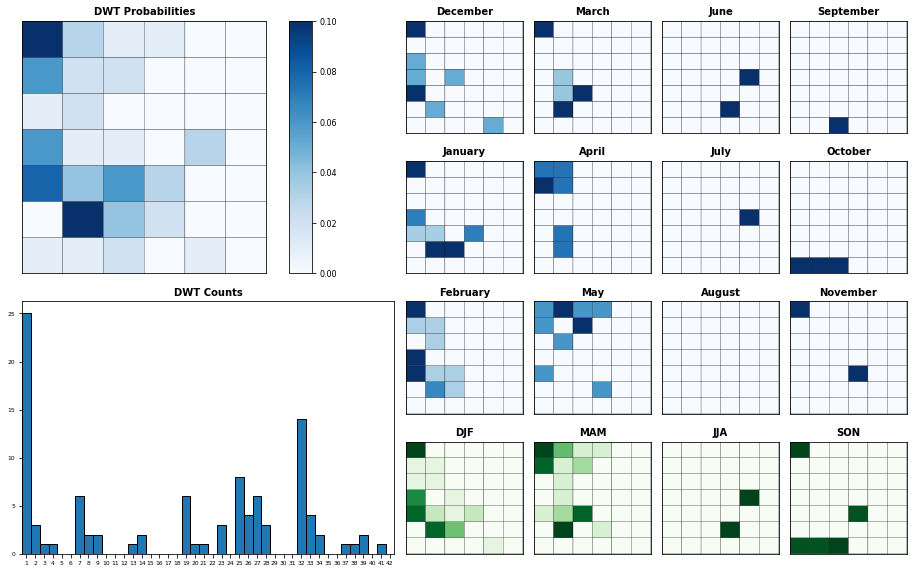

In [24]:
# Plot Annual Maxima DWT probabilities by month
n_clusters_DWT = 42   # number of DWT clusters

# Historical
Plot_DWTs_Probs(HIST_C_h_Amax['DWT'].values, HIST_C_h_Amax.time.values, n_clusters_DWT);

# Simulation
Plot_DWTs_Probs(offshore_vars_AMax['DWT'].values, offshore_vars_AMax.time.values, n_clusters_DWT);

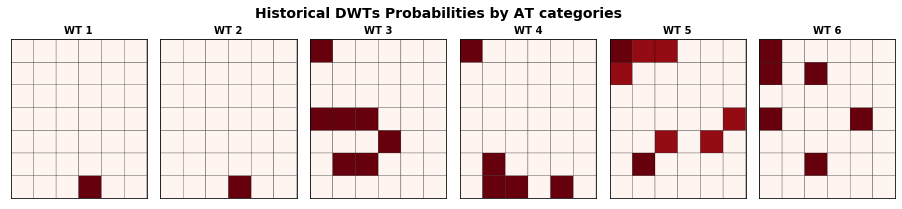

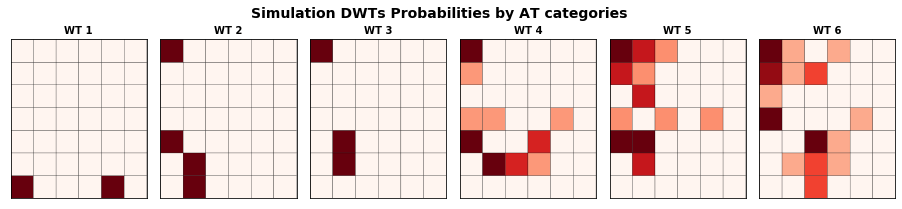

In [25]:
# Plot Annual Maxima DWT probabilities by AT category (1-6)
#AT cat 1: <0
#AT cat 2: 0 - 0.3039 [perc 50%]
#AT cat 3: 0.3039 - 0.4972 [perc 75%]
#AT cat 4: 0.4972 - 0.77 [perc 95%]
#AT cat 5: 0.77 - 0.9031 [perc 99%]
#AT cat 6: 0.9031 - 1.068 [perc 100%]

n_clusters_AT = 6
AT_amp = 42

# Simulation
AT_amp = HIST_C_h_Amax['AT_category'].values-1
DWT_bmus = HIST_C_h_Amax['DWT'].values-1

Plot_Probs_WT_WT(
    AT_amp, DWT_bmus, n_clusters_AT, n_clusters_DWT,
    wt_colors=False, ttl='Historical DWTs Probabilities by AT categories');


# Simulation
AT_amp = offshore_vars_AMax['AT_category'].values-1
DWT_bmus = offshore_vars_AMax['DWT'].values-1

Plot_Probs_WT_WT(
    AT_amp, DWT_bmus, n_clusters_AT, n_clusters_DWT,
    wt_colors=False, ttl='Simulation DWTs Probabilities by AT categories');
